# Quadratur Formeln

**Achtung:** Hintergrundwissen Quadratur Formeln (**nicht** SEP Inhalt!). Es beinhaltet aber viele interessante Punkte, mathematische wie auch Software technische. In der Umsetzung kommt ein Mix aus Numerik und symbolischem Rechnen mit Hilfe von `sympy` zur Anwendung. Bitte beachten Sie, dass Befehle wie `solve, nsolve` in der SEP **nicht** akzeptiert werden!

Der Fokus liegt auf den sogenannten Quadratur Formeln:

$$Q(f) = h\cdot \sum_{j=1}^s b_j f(\xi_j) \approx \int_{x_k}^{x_{k+1}} f(x) dx$$

Wir betrachten zwei wichtige Zugänge zu den Quadratur Formeln:

- Interpolation der zu integrierenden Funktion mit Hilfe von Lagrange Polynome an **fest vorgegeben Stützstellen**.
- **Optimale Verteilung von Stützstellen** im Sinne der maximalen Polynomordnung für eine exakte Integration.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from scipy.interpolate import lagrange
colors=['tab:blue','tab:orange','tab:green','tab:red','tab:purple','tab:brown','tab:pink','tab:gray','tab:olive','tab:cyan']
from ipywidgets import interact
import ipywidgets as widgets

## Integration mit Hilfe von Lagrange Polynomen

### Lagrange Interpolationspolynome

Die Lagrange-Polynominterpolation hat eine eindeutige Lösung $P_n\in\Pi_n$ gegeben durch

$$P_n(x) = \sum_{j=0}^n f(x_j) \ell_{j\, n}(x),$$

mit

\begin{equation}\label{eq:lagrangepoly}\ell_{j\, n}(x) = \prod_{\substack{k=0\\ k\not= j}}^n \frac{x-x_k}{x_j-x_k}.\end{equation}

Wir betrachten die Lagrangepolynome auf dem Einheitsintervall $[0,1]$.

In [2]:
basispolynome = []
xi = []
yi = []
for p in range(1,6):
    # die Stützstellen werden äquidistant verteilt 
    x = np.linspace(0,1,p+1)
    id = np.eye(p+1)
    basispolynome.append([lagrange(x,e) for e in id])
    xi.append(x)
    yi.append(id)

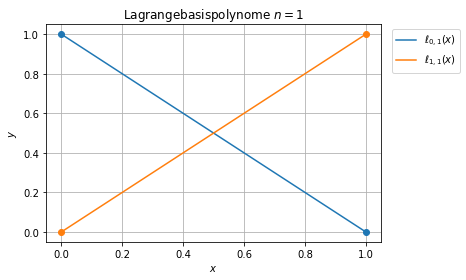

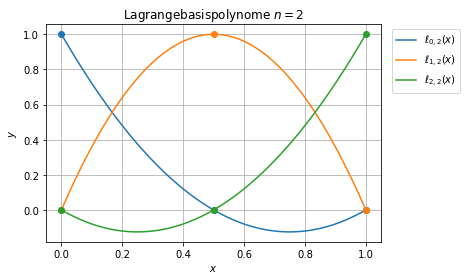

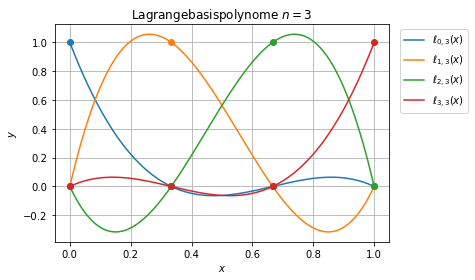

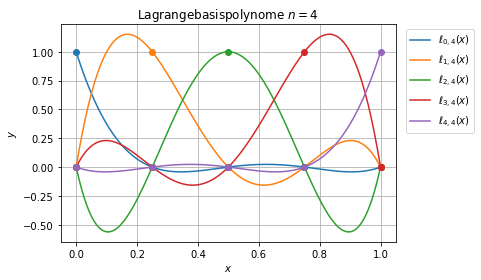

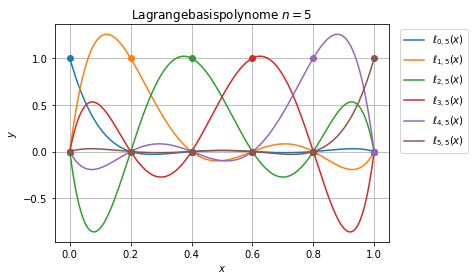

In [3]:
xp=np.linspace(0,1,200)
for p,xii,yii in zip(basispolynome,xi,yi):
    j = 0
    for pi,yiii in zip(p,yii):
        plt.plot(xp,pi(xp),label='$\ell_{'+str(j)+','+str(len(p)-1)+'}(x)$',c=colors[j])
        plt.plot(xii,yiii,'o',c=colors[j])
        j+=1
    plt.title(r'Lagrangebasispolynome $n='+str(len(p)-1)+'$')
    #plt.axhline(0,color='gray')
    #plt.axhline(1,color='gray')
    plt.legend(loc=1,bbox_to_anchor=(1.25,1))
    plt.grid()
    plt.xlabel('$x$')
    plt.ylabel('$y$')
    plt.show()

Für die Lagrange-Polynominterpolation

$$P_n(x) = \sum_{j=0}^n f(x_j) \ell_{j\, n}(x),$$

erhalten wir z.B. für die Funktion

$$f(x) = x+\sin(2\pi x^2)$$

auf dem Einheitsintervall die folgenden Interpolationspolynome.

In [4]:
def f(x):
    return x+np.sin(2*np.pi*x**2)

In [5]:
x = sp.symbols('x')

In [6]:
g=[sp.expand(np.sum([f(xi[k][j])*(basispolynome[k][j](x)) for j in range(len(xi[k]))])) for k in range(len(xi))]
j = 1
for gi in g:
    print('Interpolationspolynom Grad n='+str(j)+':')
    display(gi)
    j+=1

Interpolationspolynom Grad n=1:


1.0*x

Interpolationspolynom Grad n=2:


-4.0*x**2 + 5.0*x

Interpolationspolynom Grad n=3:


4.06036079587175*x**3 - 8.30635863808509*x**2 + 5.24599784221334*x

Interpolationspolynom Grad n=4:


64.0*x**4 - 119.836086776211*x**3 + 63.7541301643171*x**2 - 6.91804338810571*x

Interpolationspolynom Grad n=5:


113.486167251067*x**5 - 221.278537875213*x**4 + 130.873060027612*x**3 - 25.8473335919819*x**2 + 3.76664418851616*x

Erstellen wir aus der Sympy Expressions der Interpolationspolynome aufrufbare Funktionen für die graphische Darstellung.

In [7]:
finterpolated=[sp.lambdify(x,gi) for gi in g]

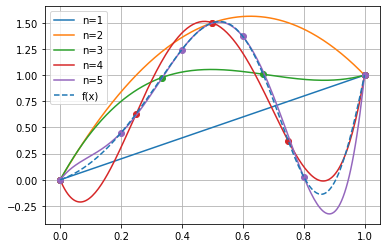

In [8]:
j=0
for fi in finterpolated:
    plt.plot(xp,fi(xp),label='n='+str(j+1),color=colors[j])
    plt.plot(xi[j],f(xi[j]),'o',color=colors[j])
    j+=1
plt.plot(xp,f(xp),'--',label='f(x)')
plt.legend()
plt.grid()

### Newton-Cotes-Formeln

Zurück zur Integration:

$$\int_0^1 f(x) dx \approx \int_0^1 P_n(x) dx = \int_0^1 \sum_{j=0}^n f(x_j) \ell_{j\, n}(x) dx$$

Die Berechnung des Integrals kann nun **ohne** Kenntnis von $f(x)$ vorgezogen werden

$$\int_0^1 f(x) dx \approx \int_0^1 \sum_{j=0}^n f(x_j) \ell_{j\, n}(x) dx =  \sum_{j=0}^n f(x_j) \int_0^1 \ell_{j\, n}(x) dx$$

da $f(x_j)$ konstante Faktoren sind, mit dem Ziel eine Quadratur Formel

$$Q(f) = h\cdot \sum_{j=1}^s b_j f(\xi_j) \approx \int_{x_k}^{x_{k+1}} f(x) dx$$

zu erhalten. Damit erhalten wir die Gewichte $b_j$, wobei in der Quadratur Formel für den Index $j = 1, \ldots, n+1=s$ gilt.

In [9]:
b = []
for p in basispolynome:
    b.append([sp.integrate(pi(x),(x,0,1)) for pi in p])

In [10]:
j=1
for bj in b:
    print('n='+str(j)+':')
    print(bj)
    j+=1

n=1:
[0.500000000000000, 0.500000000000000]
n=2:
[0.166666666666667, 0.666666666666667, 0.166666666666667]
n=3:
[0.125000000000000, 0.374999999999999, 0.375000000000000, 0.125000000000000]
n=4:
[0.0777777777777793, 0.355555555555558, 0.133333333333333, 0.355555555555554, 0.0777777777777775]
n=5:
[0.0659722222222250, 0.260416666666664, 0.173611111111095, 0.173611111111128, 0.260416666666668, 0.0659722222222214]


n=1: Trapezregel<br>
n=2: 2/3-Regel<br>
n=3: Simpson-Regel

**Bemerkung:** Bei diesem Zugang ist die Integrationsordnung nicht optimal. Nicht desto trotz basieren einige numerische Methoden für die Integration von Differentialgleichungen auf diesen Quadratur-Formeln:

n=1: Trapezmethode (implizit)<br>
n=2: klassisches Runge-Kutta Verfahren 4. Ordnung (explizit)

## Gauss-Quadratur

Bei Newton-Cotes-Formeln höherer Ordnung ergeben sich Gewichte mit wechselnden Vorzeichen. Aufgrund von Auslöschung sind derartige Formeln weniger stabil.

Eine weitere Einschränkung bei den Newton-Cotes-Formeln ist die Festlegung auf äquidistante Stützstellen. Die Frage ist, ob sich nicht die Fehlerordnung hochschrauben liesse, wenn man die Stützstellen freigibt.

### Gauss-Quadratur 1. Ordnung

**Beispiel:** mit n = 1 folgt

$$\int_{-1}^1 f(x) dx \approx 2\cdot (c_0 f(x_0) + c_1 f(x_1))$$

Wir haben daher 4 Parameter, was eine exakte Integration von Polynom bis und mit 3. Grad zulassen sollte.

Daher stellen wir die Gleichungen für $f(x) = x^k$:

$$\int_{-1}^1 x^k dx \approx 2\cdot (c_0 x_0^k + c_1 x_1^k)\quad k = 0, 1, 2, 3$$

In [11]:
c0,x0,c1,x1 = sp.symbols('c0,x0,c1,x1')

Die Integrationsgrenzen werden in diesem Ansatz symmetrisch gewält, was zu einem einfacher lösbaren **nichtlinearen** Gleichungssystem führt:

In [12]:
for k in range(4):
    display(sp.Equality(sp.integrate(x**k,(x,-1,1)),2*(c0*x0**k+c1*x1**k)))

Eq(2, 2*c0 + 2*c1)

Eq(0, 2*c0*x0 + 2*c1*x1)

Eq(2/3, 2*c0*x0**2 + 2*c1*x1**2)

Eq(0, 2*c0*x0**3 + 2*c1*x1**3)

Wir erhalten zwei äquivalente Lösungen:

In [13]:
sp.solve([sp.integrate(x**k,(x,-1,1))-2*(c0*x0**k+c1*x1**k) for k in range(4)])

[{c0: 1/2, c1: 1/2, x0: -sqrt(3)/3, x1: sqrt(3)/3},
 {c0: 1/2, c1: 1/2, x0: sqrt(3)/3, x1: -sqrt(3)/3}]

Mit dem Ansatz könen wir beliebige Polynome 3. Grades **exakt** integrieren, was schon sehr verblüffend ist!

In [14]:
def f(x):
    return 1+x+x**2-x**3

In [15]:
sp.integrate(f(x),(x,-1,1))

8/3

Mit Hilfe der Quadratur-Formel erhalten wir:

In [16]:
2*(0.5*f(-np.sqrt(3)/3)+0.5*f(np.sqrt(3)/3))

2.6666666666666665

Diese Quadratur Formel findet Anwendung zum Integrieren von Differentialgleichugen im Verfahren nach Hammer und Hollingsworth, ein voll implizites zwei stufiges Runge-Kutta Verfahren mit optimaler Konvergenzordnung.

### Gaus-Quadratur höherer Ordnung

In [17]:
s=sp.symbols('s')

In [18]:
m=3
c = sp.symbols('c:'+str(m))
x = sp.symbols('x:'+str(m))
sol=sp.solve([sp.integrate(s**k,(s,-1,1))-2*np.sum([c[i]*x[i]**k for i in range(m)]) for k in range(2*m)])
sol

[{c0: 5/18, c1: 5/18, c2: 4/9, x0: -sqrt(15)/5, x1: sqrt(15)/5, x2: 0},
 {c0: 5/18, c1: 5/18, c2: 4/9, x0: sqrt(15)/5, x1: -sqrt(15)/5, x2: 0},
 {c0: 5/18, c1: 4/9, c2: 5/18, x0: -sqrt(15)/5, x1: 0, x2: sqrt(15)/5},
 {c0: 5/18, c1: 4/9, c2: 5/18, x0: sqrt(15)/5, x1: 0, x2: -sqrt(15)/5},
 {c0: 4/9, c1: 5/18, c2: 5/18, x0: 0, x1: -sqrt(15)/5, x2: sqrt(15)/5},
 {c0: 4/9, c1: 5/18, c2: 5/18, x0: 0, x1: sqrt(15)/5, x2: -sqrt(15)/5}]

Die Lösung 2 ist in der gewünschten Reihenfolge:

In [19]:
sol[2]

{c0: 5/18, c1: 4/9, c2: 5/18, x0: -sqrt(15)/5, x1: 0, x2: sqrt(15)/5}

Mit der Quadratur Formel

$$Q(g) = 2\cdot\left(\frac{5}{18} g(-\sqrt{15}/5) + \frac{4}{9} g(0) + \frac{5}{18} g(\sqrt{15}/5)\right)$$

können Polynome bis 5. Grad exakt integriert werden:

In [20]:
def Q(g):
    return 2*np.sum([sol[2][c[k]]*g(sol[2][x[k]]) for k in range(len(c))])

In [21]:
p=sp.random_poly(s,5,-10,10)
p

7*s**5 - 5*s**3 + 8*s**2 - 3*s - 10

analytisches Resultat:

In [22]:
sp.integrate(p,(s,-1,1))

-44/3

Resultat mit Quadratur Formel:

In [23]:
Q(sp.lambdify(s,p))

-44/3

Mit `scypy` können weitere Koeffizienten nicht mehr algebraisch gelöst werden. In Mathematica kann die Rechnung bis ca. m=8 fortgesetzt werden. Unabhängig davon macht es Sinn, die Lösungen numerisch zu berechnen. Die Stützstellen sind irrational und werden in der Regel in einer Lookup Tabelle zur Verfügung gestellt.

In [24]:
sp.nsolve([sp.integrate(s**k,(s,-1,1))-2*np.sum([c[i]*x[i]**k for i in range(m)]) for k in range(2*m)],
          (*x,*c),
          (*np.linspace(-1,1,3),*np.ones(3)/3))

Matrix([
[  -0.774596669241483],
[6.05845175209737e-27],
[   0.774596669241483],
[   0.277777777777778],
[   0.444444444444444],
[   0.277777777777778]])

In [25]:
sp.N(sol[2][x[2]])

0.774596669241483

In [26]:
m=4
c = sp.symbols('c:'+str(m))
x = sp.symbols('x:'+str(m))
sol=sp.nsolve([sp.integrate(s**k,(s,-1,1))-2*np.sum([c[i]*x[i]**k for i in range(m)]) for k in range(2*m)],
          (*x,*c),
          (*np.linspace(-1+1/m**2,1-1/m**2,m),*np.ones(m)/m))
print('x_i=',sol[:m])
print('c_i=',sol[m:])

x_i= [-0.861136311594053, -0.339981043584856, 0.339981043584856, 0.861136311594053]
c_i= [0.173927422568727, 0.326072577431273, 0.326072577431273, 0.173927422568727]


Polynomgrad mit exakter Integration:

In [27]:
2*m-1

7

In [28]:
m=5
c = sp.symbols('c:'+str(m))
x = sp.symbols('x:'+str(m))
sol=sp.nsolve([sp.integrate(s**k,(s,-1,1))-2*np.sum([c[i]*x[i]**k for i in range(m)]) for k in range(2*m)],
          (*x,*c),
          (*np.linspace(-1+1/m**2,1-1/m**2,m),*np.ones(m)/m))
print('x_i=',sol[:m])
print('c_i=',sol[m:])

x_i= [-0.906179845938664, -0.538469310105683, -2.41385608130116e-21, 0.538469310105683, 0.906179845938664]
c_i= [0.118463442528095, 0.239314335249683, 0.284444444444444, 0.239314335249683, 0.118463442528095]


Polynomgrad mit exakter Integration:

In [29]:
2*m-1

9

## Integration über ein beliebiges Intervall

Bis hier hin haben wir die Integration über das Referenzintervall $[0,1]$ bzw. $[-1,1]$ betrachtet. Abschliessend betrachten wir nun die Integration über ein beliebiges Intervall $[a,b]$:

$$\int_a^b f(x) dx.$$

Dazu gehen wir wie folgt vor:

1. Unterteile $[a,b]$ in Teilintervalle $[x_{k-1},x_k]$
2. Approximiere das Teilintegral auf jedem Intervall $[t_{k-1},t_k]$ mit einer Quadratur Formel
3. Summieren liefert
$$\int_a^bf(x) dx = \sum_{k=1}^n \int_{t_{k-1}}^{t_k} f(x) dx \approx \sum_{k=1}^n h_k\cdot \sum_{j=1}^s b_j f(\xi_j)$$

Das einzige was noch zu definieren ist, ist die Position der Funktionauswertung $\xi_j$. Die Integratinspunkte sind  durch die Quadratur Formel gegeben auf dem Referenzintervall. Wir bezeichnen nun die Integrationspunkte im Referenzintervall mit $c_j$, dann folgt

- Referenzintervall $[0,1]$: $\xi_j = x_k + h_k \cdot c_j$
- Referenzintervall $[-1,1]$: $\xi_j = x_k + \frac{h_k}{2} \cdot (1+c_j)$

Wir betrachten folgende Beispiel:

$$\int_0^{\sqrt{3\pi}} \sin(x^2) dx$$

In [30]:
Iexakt = float(sp.N(sp.integrate(sp.sin(s**2),(s,0,(3*np.pi)**0.5))))
Iexakt

0.7882589655667055

In [31]:
def f(x):
    return np.sin(x**2)

Die Teilintervalle wählen wir nicht äquidistant, so dass die Grenzen jeweilen im Nulldurchgang bzw. in den Extremalpunkte liegen.

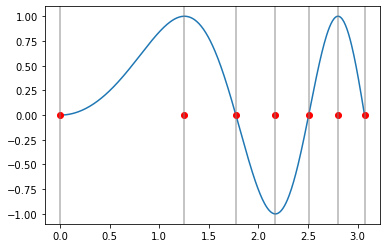

In [32]:
xp = np.linspace(0,(3*np.pi)**0.5,400)
xi = np.sqrt(np.linspace(0,(3*np.pi),7))
plt.plot(xp,f(xp))
plt.plot(xi,np.zeros_like(xi),'ro')
for x in xi:
    plt.axvline(x,c='gray',alpha=0.6)

### Newton-Cotes Formel

Wir benutzen nun die Simpson-Regel in jedem Teilintervall:

In [33]:
bS = np.array([1/8, 3/8, 3/8, 1/8])
cS = np.linspace(0,1,bS.shape[0])
xi = np.sqrt(np.linspace(0,(3*np.pi),7))

def visualize(k,b,c,xi,trafo):
    hk = (xi[k+1]-xi[k])
    s = hk*f(trafo(xi[k],hk,c))@b

    plt.plot(xp,f(xp))
    plt.plot(xi,np.zeros_like(xi),'ro')
    for x in xi:
        plt.axvline(x,c='gray',alpha=0.6)
    plt.plot(trafo(xi[k],hk,c),f(trafo(xi[k],hk,c)),'go')
    for x in trafo(xi[k],hk,c):
        plt.axvline(x,c='tab:orange',alpha=0.6)
    plt.title('Teilsumme = '+str(np.round(s,3)))
    plt.show()
    
interact(lambda k: visualize(k,bS,cS,xi,lambda x,h,c: x+h*c), k=widgets.IntSlider(min=0, max=xi.shape[0]-2, step=1, value=0));

interactive(children=(IntSlider(value=0, description='k', max=5), Output()), _dom_classes=('widget-interact',)…

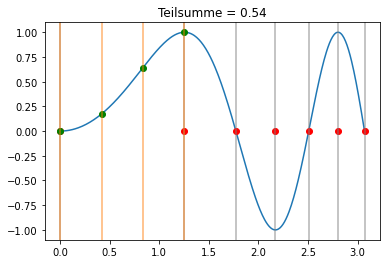

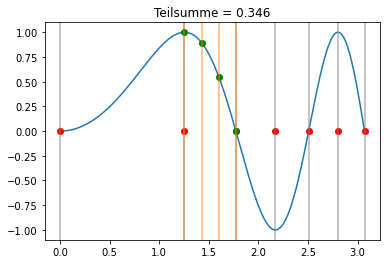

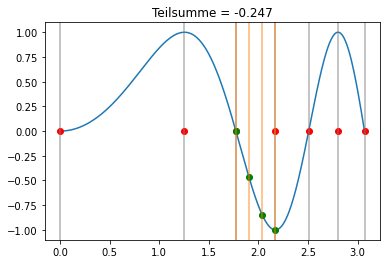

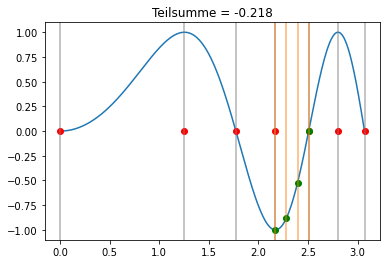

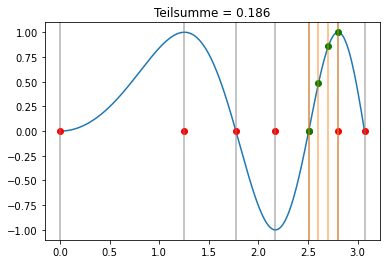

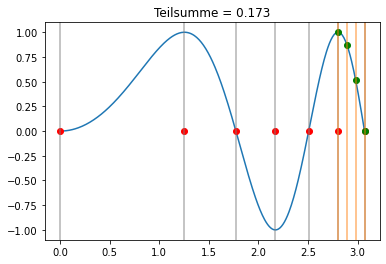

In [34]:
for k in range(xi.shape[0]-1):
    visualize(k,bS,cS,xi,lambda x,h,c: x+h*c)

Für das Integral folgt in dem Fall:

In [35]:
ISimpson = 0
for k in range(xi.shape[0]-1):
    hk = (xi[k+1]-xi[k])
    ISimpson += hk*f(xi[k]+hk*cS)@bS
ISimpson

0.7800407349978202

Der absolute Fehler beträgt mit dieser Diskretisierung und Quadratur Formel:

In [36]:
ISimpson-Iexakt

-0.008218230568885265

### Gauss-Quadratur

Wir benutzen nun die Gauss-Quadratur m=3 in jedem Teilintervall:

In [37]:
bG = np.array([5/18,4/9,5/18])
cG = np.array([-np.sqrt(15)/5,0,np.sqrt(15)/5])

interact(lambda k: visualize(k,bG,cG,xi,lambda x,h,c: x+h/2*(1+c)), k=widgets.IntSlider(min=0, max=xi.shape[0]-2, step=1, value=0));

interactive(children=(IntSlider(value=0, description='k', max=5), Output()), _dom_classes=('widget-interact',)…

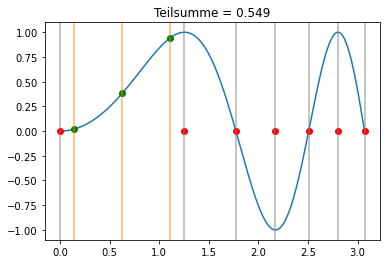

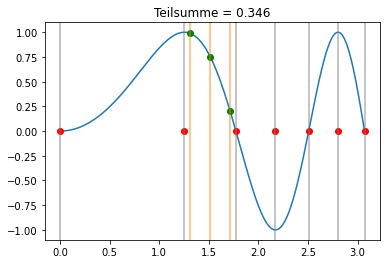

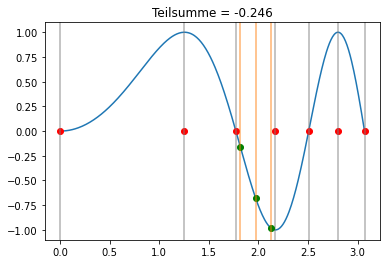

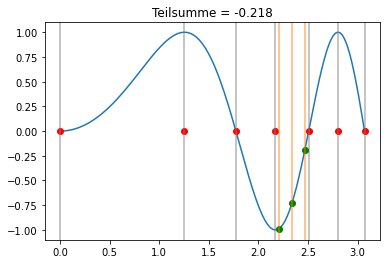

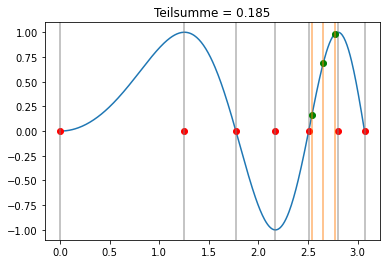

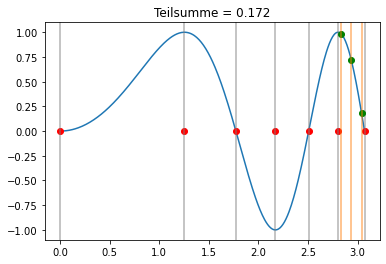

In [38]:
for k in range(xi.shape[0]-1):
    visualize(k,bG,cG,xi,lambda x,h,c: x+h/2*(1+c))

Der Unterschied zwischen den Newton-Cotes Formeln und der Gauss-Quadratur ist auch gut sichtbar darin, dass bei der Gauss-Quadratur nur Punkte innerhalb der Teilintervalle ausgewertet werden.

Für das Integral folgt in dem Fall:

In [39]:
IGauss = 0
for k in range(xi.shape[0]-1):
    hk = (xi[k+1]-xi[k])
    IGauss += hk*f(xi[k]+hk/2*(1+cG))@bG
IGauss

0.7879919336252061

Der absolute Fehler beträgt mit dieser Diskretisierung und Quadratur Formel:

In [40]:
IGauss-Iexakt

-0.0002670319414993516

Im Vergleich nochmals der Fehler mit der Simpson-Regel:

In [41]:
ISimpson-Iexakt

-0.008218230568885265

Das Resultat der Simpson-Regel ist bedeutend schlechter als das der Gauss-Quadratur, obwohl eine Stützstelle weniger benutzt wurde.